# Método de Box-Muller para generar una V.A. con distribución normal

En este ejercicio se quiere generar variables aleatorias con distribución normal estándar, es decir aquellas que tienen una funcion densidad de probabilidad gasussiana con $\mu=0$ y $\sigma=1$ :

$$f(x)=\frac{e^{-x^2/2}}{\sqrt{2\pi}}$$

En este caso, esta función distribución es muy difícil de invertir para usar el método de la función inversa, y la probabilidad tampoco puede encuadrarse, ya que x se encuentra en $(-\infty, \infty)$. Por ello, se utiliza el método de Box-Muller, el cual permite la generación de pares de números aleatorios independientes con distribución normal estándar a partir de 2 variables aleatorias uniformes distribuidas en [0,1].

### *Desarrollo teórico - Método Box Muller tradicional*

Sean X e Y dos variables aleatorias normales estándar. 
Se pide también que sean independientes, así su función de densidad de probabilidad conjunta satisface:

$$f(X,Y)=f(X).f(Y)$$

Reemplazando con las funciones de densidades de probabilidad de cada una, se obtiene:

$$f(X,Y)=\frac{e^{-(X^2+Y^2)/2}}{2\pi}$$

Se definen 2 variables aleatorias nuevas e independientes $R^2$ y $\theta$ tal que sigan el siguiente cambio de variables:

$$R^2=X^2+Y^2$$

$$tan(\theta)=\frac{Y}{X}$$

Se quiere encontrar la densidad de probabilidad conjunta de las variables $R^2$ y $\theta$ y para ello se utiliza el Teorema de cambio de varibles aleaatorias, ya que se conoce la f(X,Y) y las funciones que relacionan las 2 variables.

Realizando la integral correspondiente del Teorema mencionado se llega a que:

$$f(R^2,\theta)=\frac{1}{2\pi}.\frac{e^{-R^2/2}}{2}$$

Al pedir que $R^2$ y $\theta$ sean independientes, se tiene que:

$$f(R^2,\theta)=f(R^2).f(\theta)$$

Luego, se determina que $f(R^2,\theta)$ equivale al producto de una densidad de probabilidad exponencial con media 2 y una distribución uniforme en $[0,2\pi]$.


Por lo tanto,

$$f(R^2)=\frac{e^{-R^2/2}}{2}$$

$$f(\theta)=\frac{1}{2\pi}$$


Entonces, se ve que si se sortean dos variables X e Y con distribución normal estándar y se realiza un cambio de variables, se llega a 2 nuevas variables, una con distribución uniforme y la otra con una exponencial. Si se realiza el camino inverso, a partir de estas últimas variables es posible conseguir 2 variables independientes con distribución normal estándar, usando:

$$X=R.cos(\theta)$$

$$Y=R.sen(\theta)$$


Se utiliza este método, para encontrar X e Y usando la generación de las variables $R^2$ y $\theta$ cuyas distribuciones son más simples que de construir que la gaussiana.

Sean $U_1$ y $U_2$ dos varibles aleatorias y uniformes en el intervalo [0,1].

Se pueden obtener números aleatorios distribuidos exponencialmente $R^2$, por medio del método de la función inversa:

$$R^2=-2log(1-U_1)$$

Y para la distribución de $\theta$ al ser también uniforme se obtiene multiplicando una de las variables U por $2\pi$:

$$\theta=2\pi U_2$$

Reemplazando en X e Y se obtiene:
$$X=\sqrt{-2log(1-U_1)}cos(2\pi U_2)$$
(Ec 1)
$$Y=\sqrt{-2log(1-U_1)}sen(2\pi U_2)$$

Se realiza el siguiente programa para realizarlo:

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
sns.set()

In [5]:
def box_muller(n):           #defino la funcion
    lista_x=[]               #listas vacías
    lista_y=[]
    for i in range(n):       #recorre n veces
        U1=random.random()   #defino numeros uniformes en (0,1)
        U2=random.random()
        X=sqrt(-2*log(1-U1))*cos(2*pi*U2)   #se sigue de (Ec 1)
        Y=sqrt(-2*log(1-U1))*sin(2*pi*U2)
        lista_x.append(X)    #los agrego a las listas
        lista_y.append(Y)
    return(lista_x, lista_y)


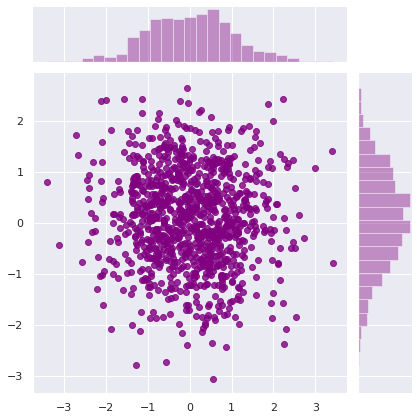

In [6]:
#Gráfico:
x, y= box_muller(n=1000)
sns.jointplot(x, y, kind='scatter', alpha=0.8, color='purple')
pass

Se puede ver que con la función jointplot() se grafica una distribución bivariada en el centro, junto con las distribuciones marginales de las dos variables X e Y. Tales distribuciones marginales son normales estándar.

Para ver esto mejor, se grafica por separado la variable X unicamente (análogamente se puede realizar con Y).
Se realiza un histograma.

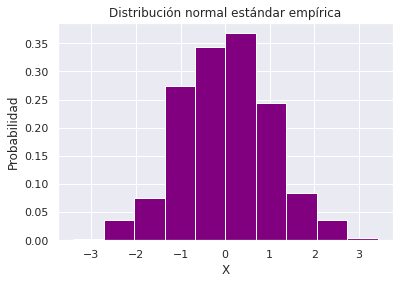

In [7]:
plt.hist(x, density=True, color='purple')
plt.title('Distribución normal estándar empírica')
plt.xlabel('X')
plt.ylabel('Probabilidad')
plt.show()

Para verificar si las variables aleatorias generadas siguen una distribución normal se usa un gráfico Q-Q, el cual es un método gráfico para comparar la distribución de probabilidad teórica con una extraída de una muestra aleatoria.

Para ello se realiza el siguiente programa, que consiste en definir un 'x_emp' que contenga las variables aleatorias X generadas por el método de Box-Muller y luego ordenar sus valores por medio de la función '.sort()'. Como estos valores están ordenados se corresponden a los cuantiles empíricos.

Ahora se quiere encontrar los valores de los cuantiles para la distribución teórica. Se usa la función 'st.norm.ppf' de scipy, la cual devuelve la posición de los cuantiles indicados por 'q=i/(x_tot)' que indica la fracción correspondiente.

Debajo se grafican los cuantiles teóricos en función de los empíricos.

In [8]:
from scipy import stats as st

In [9]:
x_emp, y_emp=box_muller(n=1000)  #genero variables aleatorias (empiricas)
x_emp.sort()  #ordeno esos valores --> Q empírico
x_tot=len(x_emp)
#
Q_teo=[]
for i in range(x_tot): #le indico que recorra el total de x ordenados
    b=st.norm.ppf(i/(x_tot), 0, 1) #defino el cuantil en el lugar que la distribucion empirica lo indica
    Q_teo.append(b)

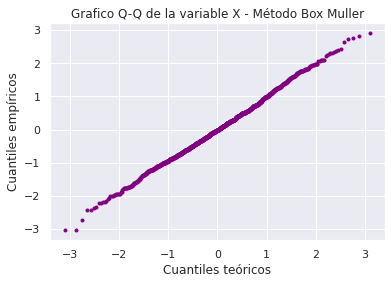

In [10]:
#Gráfico
plt.plot(Q_teo, x_emp, '.', color='purple')
plt.title('Grafico Q-Q de la variable X - Método Box Muller')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles empíricos')
plt.show()

Analizando visualmente el gráfico se puede ver que la función obtenida sorteando variables aleatorias es similar a la cual estoy comparando, es decir una distribución normal estándar, ya que se obtiene una recta en el gráfico Q-Q. 
En los extremos se produce una desviación de la recta.

Por último, se calcula el tiempo de cómputo que se necesita para realizar este método (después servirá para comparar) usando la función 'timeit'. Se genera un número elevado de puntos para que al programa le lleve un tiempo considerable calcularlo. Como el tiempo de computo depende de muchos factores y es una variable aleatoria también, se indica que se realice 7 veces y se toma un promedio de esos valores.

In [23]:
t_box_muller=%timeit -o box_muller(n=1000000)

2 s ± 25.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
ts_box_muller=t_box_muller.all_runs

In [25]:
ts_box_muller

[1.9507128660006856,
 2.0053702859986515,
 1.9976251420011977,
 1.9891899850008485,
 2.016953221998847,
 2.0058304890008003,
 2.041921189000277]

In [26]:
print('La media de los valores del tiempo de computo para Box Muller tradicional:', np.mean(ts_box_muller))

La media de los valores del tiempo de computo para Box Muller tradicional: 2.0010861684287584


### *Método Box Muller modificado*

Por último se busca mejorar la eficiencia del código generando pares aleatorios dentro del círculo de radio unidad.
Para ello, se considera el triángulo de lados definido por la hipotenusa R y el ángulo $\theta$, de lados $V_1$ y $V_2$.


Primero, se comienza generando pares de números aleatorios distribuidos uniformemente en el intervalo [-1,1]. Para ello, sean $U_1$ y $U_2$ dos varibles uniformes en el intervalo [0,1], se puede pbtener las variables $V_1$ y $V_2$ uniformes en el intervalo [-1,1] de la forma:

$$V_1=2.U_1-1$$

$$V_2=2.U_2-1$$

Asi, al tomar pares $(V_1,V_2)$ están distribuídos uniformemente en el cuadrado de lados 2x2 centrado en (0,0).

Para obetener que los pares estén distribuidos de forma uniforme dentro del círculo de radio unidad se debe pedir: $R^2=V_1^2+V_2^2\le1$

Luego, la variable $S=R^2$ está distribuída uniformemente en [0,1].



Escribiendo a $\theta$ de la siguiente forma:
$$cos(\theta)=\frac{V_1}{R}$$
(Ec 2)
$$sen(\theta)=\frac{V_2}{R}$$


Se reescriben las ecuaciones para X e Y (Ec 1):
Utilizando a S como la variable aleatoria uniforme en [0,1] en vez de $U_1$ y usando (Ec 2) para el seno y coseno de $\theta$

$$X=\sqrt{\frac{-2log(1-s)}{S}}.V_1$$
(Ec 3)
$$Y=\sqrt{\frac{-2log(1-s)}{S}}.V_2$$

Para este inciso se realiza el siguiente código definiendo la función 'box_mu', muy similar a la función 'box_muller' pero siguiendo los últios pasos explicados.

In [15]:
def box_mu(n):                #defino la función
    lista_x=[]                #listas vacías
    lista_y=[]
    for i in range(n):        #cantidad de números aleatorios
        U1=random.random()    #uniformes en (0,1)
        U2=random.random()
        V1=2*U1-1             #uniformes en (-1,1)
        V2=2*U2-1
        S=V1**2+V2**2         #defino s
        if S>1:               #está afuera del círculo unitario y no me interesa
            None
        else:                 
            X=sqrt(-2*log(1-S)/S)*V1   #se sigue de (Ec 3)
            Y=sqrt(-2*log(1-S)/S)*V2
            lista_x.append(X)  #los agrego a una lista
            lista_y.append(Y)
    return(lista_x, lista_y)


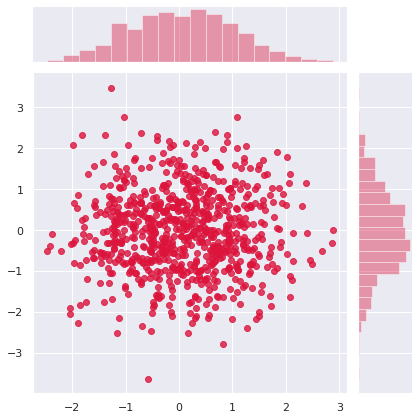

In [16]:
#Gráfico:
x2, y2= box_mu(n=1000)
sns.jointplot(x2, y2, kind='scatter', alpha=0.8, color='crimson')
pass

Sobre los ejes X e Y se pueden ver las distribuciones marginales obtenidas de las dos variables X e Y. Para confirmar que son distribuciones normales estándar se verifica este método como en el caso anterior generando un gráfico Q-Q. Se realiza solo para la variable X, pero con la variable Y es análogo.

In [17]:
x2_emp, y2_emp=box_mu(n=1000)  
x2_emp.sort()  #Q empírico
x2_tot=len(x2_emp)
#
Q2_teo=[]
for i in range(x2_tot):
    b=st.norm.ppf(i/(x2_tot), 0, 1) #defino el cuantil en el lugar que la distribucion empirica lo indica
    Q2_teo.append(b)

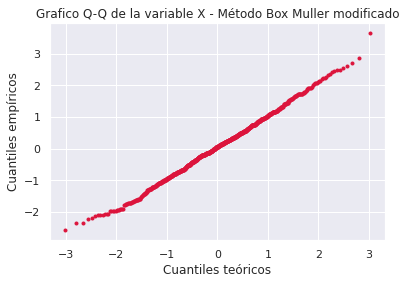

In [18]:
#Gráfico
plt.plot(Q2_teo, x2_emp, '.', color='crimson')
plt.title('Grafico Q-Q de la variable X - Método Box Muller modificado')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles empíricos')
plt.show()

De la misma forma que en método Box Muller tradicional, se verifica que la distribución obtenida es comparable con una distribución normal estándar por medio del gráfico Q-Q.

También en este caso se calcula el tiempo de cómputo con el mismo valor de n que para el métos Box Muller tradicional:

In [27]:
t_box_mu=%timeit -o box_mu(n=1000000)

1.85 s ± 88.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
ts_box_mu=t_box_mu.all_runs

In [29]:
ts_box_mu

[1.8137321760004852,
 1.8223288360022707,
 1.8024695620006241,
 1.776028199998109,
 1.8218264099996304,
 1.824625516001106,
 2.0593606410002394]

In [30]:
print('La media de los valores del tiempo de computo para Box Muller modificado:', np.mean(ts_box_mu))

La media de los valores del tiempo de computo para Box Muller modificado: 1.8457673344289236


Se puede ver que el tiempo de computo obtenido para el método Box Muller modificado es aproximadamente de 1.84s, un valor menor al del método Box Muller tradicional: 2s. Esto indica que se ganan 0.16s de tiempo de cómputo, mostranod que efectivamente se mejora la eficiencia del código.

## Conclusiones

En este ejercicio se ve que se puede usar la transformación de Box-Muller para generar 2 variables aleatorias independientes con una distribución normal estándar. Se verificó el método realizando una comparación con una distribución teórica por medio de un gráfico Q-Q el cual muestra una concordancia, concluyendo que el método es eficaz para la construcción de variables aleatorias normales estándar.

Además del metódo de Box Muller tradicional se implementó una variación que mejora la eficiencia ya que disminuye el costo computacional. Se obtiene una distribución esperada de esta forma también.